In [1]:
## import modules

# always use these
import pandas as pd
import numpy as np
import datetime as dt

# these are for plotting 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In jupyter you can also add text, its more like a way to make a report that you can also code in, what i do below where i just type the variable name and then it shows the variable is a jupyter thing, you cant do that in a .py but very helpful for learning. 

In [3]:
# create a dataframe -- this is like a spreadsheet
df = pd.DataFrame({'a':[1,2,3],'b':[12,13,14],'c':[21,22,23]})
df

,a,b,c
0,1,12,21
1,2,13,22
2,3,14,23


In [4]:
# sum columns a and b
df['a'] + df['b']

0    13
1    15
2    17
dtype: int64

In [5]:
# sum columns a and b and store in column d
df['d'] = df['a'] + df['b']
df

,a,b,c,d
0,1,12,21,13
1,2,13,22,15
2,3,14,23,17


In [6]:
# sum all columns in df
df.sum(axis=1)

0    47
1    52
2    57
dtype: int64

In [7]:
# sum all rows in df
df.sum(axis=0)

a     6
b    39
c    66
d    45
dtype: int64

In [8]:
# multiple or divide 
df['a'] / df['b']

0    0.083333
1    0.153846
2    0.214286
dtype: float64

In [9]:
df['a'] * df['b']

0    12
1    26
2    42
dtype: int64

In [10]:
# compute mean of columns
df['a'].mean()

2.0

In [11]:
# compute std of columns
df['a'].std()

1.0

In [12]:
# compute for all columns
df.mean()

a     2.0
b    13.0
c    22.0
d    15.0
dtype: float64

In [13]:
# compute for all rows
df.mean(axis=1)

0    11.75
1    13.00
2    14.25
dtype: float64

<AxesSubplot:title={'center':'Test Plots'}>

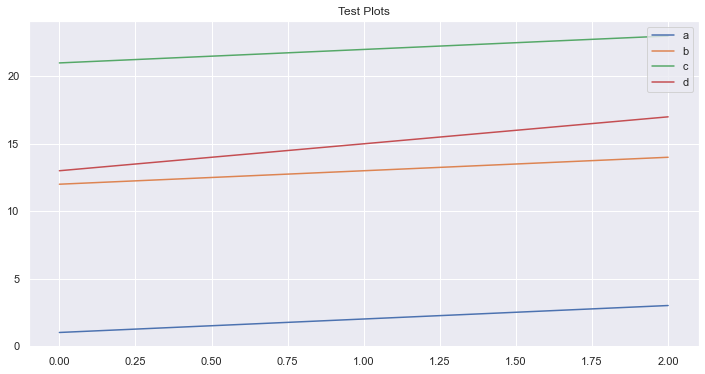

In [14]:
# plot all the data as lines
df.plot(kind='line',figsize=(12,6),title='Test Plots')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

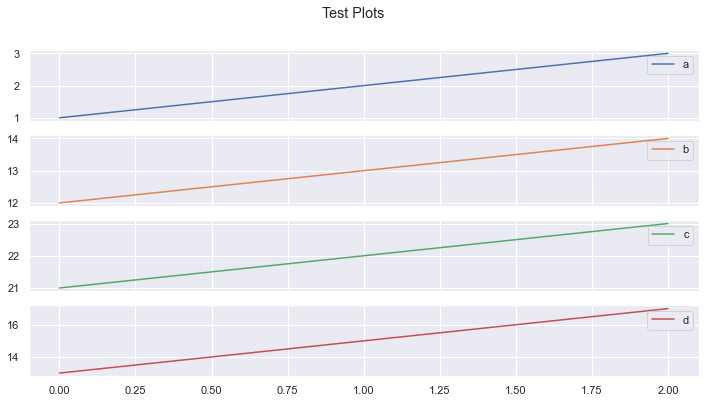

In [15]:
# plots as subplots
df.plot(kind='line',figsize=(12,6),title='Test Plots',subplots=True,sharex=True)

<AxesSubplot:title={'center':'test histogram'}, ylabel='Frequency'>

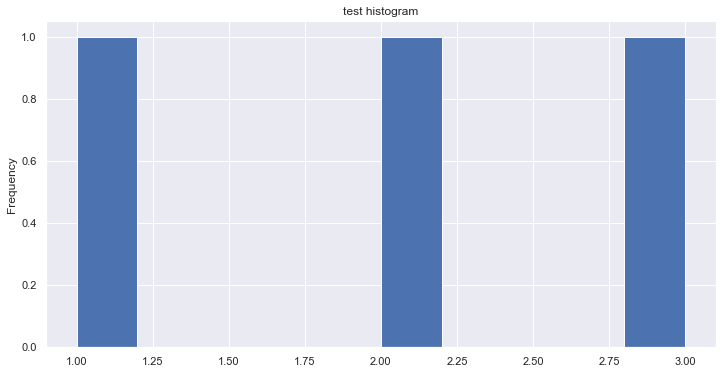

In [16]:
# plot column as hist
df['a'].plot(kind='hist',figsize=(12,6),title='test histogram')

Hopefully this helps you get a start in pandas, the other really common operation is to read from a .csv --  what i do below is read from yf package -- you may have to install -- just google yahoofinancials package pypi and type the command in the anaconda prompt


In [20]:
# read the .csv
import os
data = pd.read_csv(os.path.join('C:\AAPL (1).csv'))
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600
...,...,...,...,...,...,...,...
10261,2021-08-24,149.449997,150.860001,149.149994,149.619995,149.619995,48606400
10262,2021-08-25,149.809998,150.320007,147.800003,148.360001,148.360001,58991300
10263,2021-08-26,148.350006,149.119995,147.509995,147.539993,147.539993,48597200
10264,2021-08-27,147.479996,148.750000,146.830002,148.600006,148.600006,55721500


In [24]:
# calculate annualized sharpe
data['dailyReturn'] = data['Adj Close'].pct_change() # this is daily return
annSharpe = (data['dailyReturn'].mean() / data['dailyReturn'].std()) * (252**0.5)

print('Annualized Sharpe for AAPL: {}'.format(round(annSharpe,2)))

Annualized Sharpe for AAPL: 0.63


In [26]:
# turn into timeseries 
data['Date'] = pd.to_datetime(data['Date']) 
data.set_index('Date',inplace=True,drop=True)
data

,Open,High,Low,Close,Adj Close,Volume,dailyReturn
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800,-0.052167
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000,-0.073402
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600,0.024753
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600,0.028993
...,...,...,...,...,...,...,...
2021-08-24,149.449997,150.860001,149.149994,149.619995,149.619995,48606400,-0.000601
2021-08-25,149.809998,150.320007,147.800003,148.360001,148.360001,58991300,-0.008421
2021-08-26,148.350006,149.119995,147.509995,147.539993,147.539993,48597200,-0.005527


<AxesSubplot:title={'center':'Daily Return AAPL'}, xlabel='Date'>

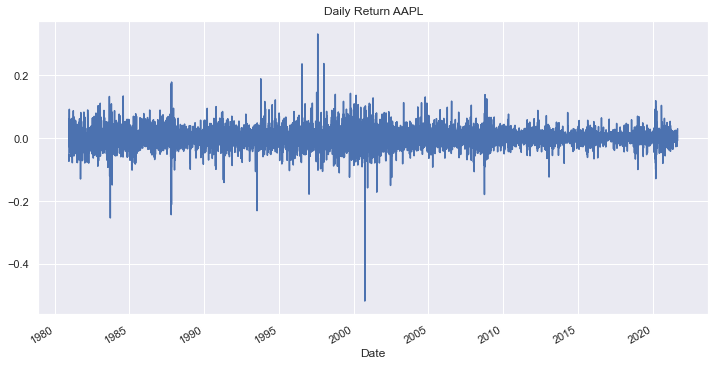

In [27]:
data['dailyReturn'].plot(kind='line',figsize=(12,6),title='Daily Return AAPL')

<AxesSubplot:title={'center':'Cumulative Return'}, xlabel='Date'>

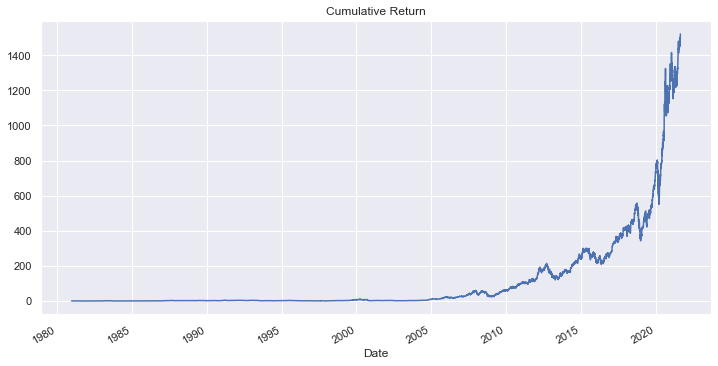

In [29]:
((data['dailyReturn']+1).cumprod()-1).plot(kind='line',figsize=(12,6),title='Cumulative Return')

<AxesSubplot:title={'center':'Cumulative Return post 2010'}, xlabel='Date'>

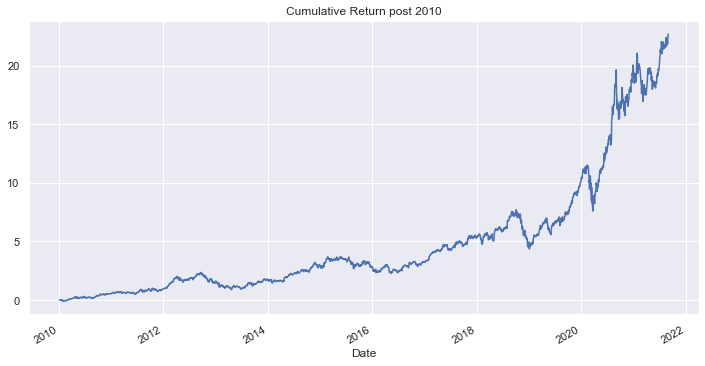

In [31]:
# cumulative return post 2010
((data['dailyReturn'].loc[dt.date(2010,1,1):]+1).cumprod()-1).plot(kind='line',figsize=(12,6),title='Cumulative Return post 2010')